In [136]:
import numpy as np
import pandas as pd

import sklearn
from sklearn import preprocessing
from datetime import datetime, timedelta

import tensorflow.keras as keras
import tensorflow.keras.backend as K
import tensorflow as tf

In [292]:
df = pd.read_csv('./Datasets/merged_data_first_half.csv').append(pd.read_csv('./Datasets/merged_data_second_half.csv'))
df = df.fillna(0).sort_values('unix').reset_index()

In [293]:
df['utc'] = df['unix'] / 1000
df['timestamp'] = df.utc.apply(lambda s: datetime.utcfromtimestamp(s).strftime('%Y-%m-%d %H:%M:%S'))
df['date'] = df.utc.apply(lambda s: datetime.utcfromtimestamp(s).strftime('%Y-%m-%d'))

In [294]:
df.columns = [s.replace(' ','_').lower() for s in df.columns]

In [300]:
val_cols = [c for c in df.columns.values if c not in ['index', 'unix', 'utc', 'timestamp', 'date', 'index']]
val_cols

['open_xrp',
 'high_xrp',
 'low_xrp',
 'close_xrp',
 'volume_xrp',
 'volume_usdt_xrp',
 'tradecount_xrp',
 'open_aave',
 'high_aave',
 'low_aave',
 'close_aave',
 'volume_aave',
 'volume_usdt_aave',
 'tradecount_aave',
 'open_ada',
 'high_ada',
 'low_ada',
 'close_ada',
 'volume_ada',
 'volume_usdt_ada',
 'tradecount_ada',
 'open_bat',
 'high_bat',
 'low_bat',
 'close_bat',
 'volume_bat',
 'volume_usdt_bat',
 'tradecount_bat',
 'open_bnb',
 'high_bnb',
 'low_bnb',
 'close_bnb',
 'volume_bnb',
 'volume_usdt_bnb',
 'tradecount_bnb',
 'open_btc',
 'high_btc',
 'low_btc',
 'close_btc',
 'volume_btc',
 'volume_usdt_btc',
 'tradecount_btc',
 'open_btt',
 'high_btt',
 'low_btt',
 'close_btt',
 'volume_btt',
 'volume_usdt_btt',
 'tradecount_btt',
 'open_celr',
 'high_celr',
 'low_celr',
 'close_celr',
 'volume_celr',
 'volume_usdt_celr',
 'tradecount_celr',
 'open_cvc',
 'high_cvc',
 'low_cvc',
 'close_cvc',
 'volume_cvc',
 'volume_usdt_cvc',
 'tradecount_cvc',
 'open_dai',
 'high_dai',
 'low_

In [301]:
for c in df.columns.values:
    if c not in val_cols:
        continue
    scaler = preprocessing.MinMaxScaler()
    scaler.fit(df[c].values.reshape(-1,1))
    df[c] = scaler.transform(df[c].values.reshape(-1,1))


In [302]:
df

,index,unix,open_xrp,high_xrp,low_xrp,close_xrp,volume_xrp,volume_usdt_xrp,tradecount_xrp,open_aave,...,open_zec,high_zec,low_zec,close_zec,volume_zec,volume_usdt_zec,tradecount_zec,utc,timestamp,date
0,0.000000,0.000000,0.049828,0.049412,0.051380,0.049879,0.000096,0.000034,0.000051,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2020-01-06 08:21:00,2020-01-06
1,0.000002,0.000001,0.049828,0.049412,0.051380,0.049879,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000001,2020-01-06 08:22:00,2020-01-06
2,0.000004,0.000002,0.049828,0.049412,0.051380,0.049879,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000002,2020-01-06 08:23:00,2020-01-06
3,0.000006,0.000003,0.049828,0.049412,0.051380,0.049879,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,2020-01-06 08:24:00,2020-01-06
4,0.000008,0.000004,0.049828,0.049412,0.051380,0.049879,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000004,2020-01-06 08:25:00,2020-01-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918661,0.930392,0.999996,0.514403,0.514370,0.516871,0.515020,0.001460,0.002777,0.004121,0.881782,...,0.333459,0.332527,0.335959,0.333441,0.000113,0.000143,0.000613,0.999996,2021-10-09 01:31:00,2021-10-09
918662,0.930394,0.999997,0.514940,0.514746,0.517248,0.515450,0.001731,0.003294,0.007961,0.881782,...,0.333459,0.332527,0.335959,0.333441,0.000113,0.000143,0.000613,0.999997,2021-10-09 01:32:00,2021-10-09
918663,0.930396,0.999998,0.515424,0.515014,0.517571,0.515665,0.002130,0.004053,0.004403,0.881782,...,0.333459,0.332527,0.335959,0.333441,0.000113,0.000143,0.000613,0.999998,2021-10-09 01:33:00,2021-10-09
918664,0.930398,0.999999,0.515585,0.514799,0.517409,0.514966,0.001051,0.002000,0.002637,0.881782,...,0.333459,0.332527,0.335959,0.333441,0.000113,0.000143,0.000613,0.999999,2021-10-09 01:34:00,2021-10-09


In [303]:
df['timestamp'] = df['timestamp'].astype("datetime64")
df['date'] = df['date'].astype("datetime64")
df = df.set_index('timestamp')

def parse_week(day):
    if day <= 7:
        return 1
    elif day <= 14:
        return 2
    elif day <= 21:
        return 3
    else:
        return 4
    
# df['week'] = df.apply(lambda s: parse_week(s['timestamp'].dt.day), axis=1)

# df.groupby([df["timestamp"].dt.year,
#             df["timestamp"].dt.month,
#             df["timestamp"].dt.day])

df

,index,unix,open_xrp,high_xrp,low_xrp,close_xrp,volume_xrp,volume_usdt_xrp,tradecount_xrp,open_aave,...,tradecount_xmr,open_zec,high_zec,low_zec,close_zec,volume_zec,volume_usdt_zec,tradecount_zec,utc,date
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-01-06 08:21:00,0.000000,0.000000,0.049828,0.049412,0.051380,0.049879,0.000096,0.000034,0.000051,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2020-01-06
2020-01-06 08:22:00,0.000002,0.000001,0.049828,0.049412,0.051380,0.049879,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000001,2020-01-06
2020-01-06 08:23:00,0.000004,0.000002,0.049828,0.049412,0.051380,0.049879,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000002,2020-01-06
2020-01-06 08:24:00,0.000006,0.000003,0.049828,0.049412,0.051380,0.049879,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,2020-01-06
2020-01-06 08:25:00,0.000008,0.000004,0.049828,0.049412,0.051380,0.049879,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000004,2020-01-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-09 01:31:00,0.930392,0.999996,0.514403,0.514370,0.516871,0.515020,0.001460,0.002777,0.004121,0.881782,...,0.0,0.333459,0.332527,0.335959,0.333441,0.000113,0.000143,0.000613,0.999996,2021-10-09
2021-10-09 01:32:00,0.930394,0.999997,0.514940,0.514746,0.517248,0.515450,0.001731,0.003294,0.007961,0.881782,...,0.0,0.333459,0.332527,0.335959,0.333441,0.000113,0.000143,0.000613,0.999997,2021-10-09
2021-10-09 01:33:00,0.930396,0.999998,0.515424,0.515014,0.517571,0.515665,0.002130,0.004053,0.004403,0.881782,...,0.0,0.333459,0.332527,0.335959,0.333441,0.000113,0.000143,0.000613,0.999998,2021-10-09


In [304]:
PREDICT_MIN_VALUE = 'low_xrp'
PREDICT_MAX_VALUE = 'high_xrp'

In [305]:
resampled = df.resample('5d')

dataset = pd.DataFrame()

for i, (timestamp, d) in enumerate(resampled):
    dataset = dataset.append(
        pd.DataFrame({
            'id': [i],
            'values': [np.array(d[val_cols])],
            'init_date': [d.date.min()],
            'end_date': [d.date.max()]
        }))
    

In [306]:
dataset

,id,values,init_date,end_date
0,0,"[[0.049827726146387086, 0.049412156464667616, ...",2020-01-06,2020-01-10
0,1,"[[0.058320477744153165, 0.05805928384598446, 0...",2020-01-11,2020-01-15
0,2,"[[0.06966206373863827, 0.0698752343049267, 0.0...",2020-01-16,2020-01-20
0,3,"[[0.06933955418429273, 0.06901589245336728, 0....",2020-01-21,2020-01-25
0,4,"[[0.062029337619126976, 0.06160406898366714, 0...",2020-01-26,2020-01-30
...,...,...,...,...
0,124,"[[0.5299907009745164, 0.529569416023503, 0.532...",2021-09-17,2021-09-21
0,125,"[[0.4137260066329466, 0.4136656837944239, 0.41...",2021-09-22,2021-09-26
0,126,"[[0.45113711493703007, 0.45040254794858986, 0....",2021-09-27,2021-10-01
0,127,"[[0.5041361850344817, 0.5033594895509402, 0.50...",2021-10-02,2021-10-06


In [307]:
dataset['end_date'] = dataset['end_date'].astype("datetime64")

dataset['last_day_min'] = dataset.apply(lambda s: df[df.date == s['end_date']][PREDICT_MIN_VALUE].min(), axis=1)
dataset['last_day_max'] = dataset.apply(lambda s: df[df.date == s['end_date']][PREDICT_MAX_VALUE].max(), axis=1)

dataset['next_day_min'] = dataset.apply(lambda s: df[df.date == (s['end_date'] + timedelta(days=1))][PREDICT_MIN_VALUE].min(), axis=1)
dataset['next_day_max'] = dataset.apply(lambda s: df[df.date == s['end_date'] + timedelta(days=1)][PREDICT_MAX_VALUE].max(), axis=1)

dataset

,id,values,init_date,end_date,last_day_min,last_day_max,next_day_min,next_day_max
0,0,"[[0.049827726146387086, 0.049412156464667616, ...",2020-01-06,2020-01-10,0.053050,0.058328,0.057574,0.061926
0,1,"[[0.058320477744153165, 0.05805928384598446, 0...",2020-01-11,2020-01-15,0.067430,0.074870,0.064467,0.069929
0,2,"[[0.06966206373863827, 0.0698752343049267, 0.0...",2020-01-16,2020-01-20,0.065706,0.070896,0.068615,0.073796
0,3,"[[0.06933955418429273, 0.06901589245336728, 0....",2020-01-21,2020-01-25,0.061990,0.063215,0.062636,0.068747
0,4,"[[0.062029337619126976, 0.06160406898366714, 0...",2020-01-26,2020-01-30,0.069369,0.077126,0.070930,0.075622
...,...,...,...,...,...,...,...,...
0,124,"[[0.5299907009745164, 0.529569416023503, 0.532...",2021-09-17,2021-09-21,0.407486,0.458835,0.412710,0.485743
0,125,"[[0.4137260066329466, 0.4136656837944239, 0.41...",2021-09-22,2021-09-26,0.425421,0.457438,0.440447,0.470919
0,126,"[[0.45113711493703007, 0.45040254794858986, 0....",2021-09-27,2021-10-01,0.453858,0.518022,0.488111,0.520063
0,127,"[[0.5041361850344817, 0.5033594895509402, 0.50...",2021-10-02,2021-10-06,0.493066,0.538754,0.506638,0.531288


In [308]:
dataset['change'] = dataset.apply(lambda s: s.next_day_max - s.last_day_max ,axis=1)
dataset['change'] = dataset['change']


dataset['change_p'] = dataset.apply(lambda s: (s.next_day_max/s.last_day_max)*100 - 100 ,axis=1)
dataset

,id,values,init_date,end_date,last_day_min,last_day_max,next_day_min,next_day_max,change,change_p
0,0,"[[0.049827726146387086, 0.049412156464667616, ...",2020-01-06,2020-01-10,0.053050,0.058328,0.057574,0.061926,0.003598,6.169429
0,1,"[[0.058320477744153165, 0.05805928384598446, 0...",2020-01-11,2020-01-15,0.067430,0.074870,0.064467,0.069929,-0.004941,-6.599713
0,2,"[[0.06966206373863827, 0.0698752343049267, 0.0...",2020-01-16,2020-01-20,0.065706,0.070896,0.068615,0.073796,0.002900,4.090909
0,3,"[[0.06933955418429273, 0.06901589245336728, 0....",2020-01-21,2020-01-25,0.061990,0.063215,0.062636,0.068747,0.005532,8.751062
0,4,"[[0.062029337619126976, 0.06160406898366714, 0...",2020-01-26,2020-01-30,0.069369,0.077126,0.070930,0.075622,-0.001504,-1.949861
...,...,...,...,...,...,...,...,...,...,...
0,124,"[[0.5299907009745164, 0.529569416023503, 0.532...",2021-09-17,2021-09-21,0.407486,0.458835,0.412710,0.485743,0.026908,5.864450
0,125,"[[0.4137260066329466, 0.4136656837944239, 0.41...",2021-09-22,2021-09-26,0.425421,0.457438,0.440447,0.470919,0.013481,2.947047
0,126,"[[0.45113711493703007, 0.45040254794858986, 0....",2021-09-27,2021-10-01,0.453858,0.518022,0.488111,0.520063,0.002041,0.393987
0,127,"[[0.5041361850344817, 0.5033594895509402, 0.50...",2021-10-02,2021-10-06,0.493066,0.538754,0.506638,0.531288,-0.007466,-1.385704


In [309]:
dataset['change_p'].max()

dataset[dataset.change_p == 94.49679607990953]

,id,values,init_date,end_date,last_day_min,last_day_max,next_day_min,next_day_max,change,change_p
0,77,"[[0.09086706693685799, 0.09046721342291972, 0....",2021-01-25,2021-01-29,0.084853,0.113992,0.095005,0.22171,0.107719,94.496796


In [310]:
dataset['label'] = dataset['change_p'].apply(lambda s: 1 if s >= 0 else 0)
dataset

,id,values,init_date,end_date,last_day_min,last_day_max,next_day_min,next_day_max,change,change_p,label
0,0,"[[0.049827726146387086, 0.049412156464667616, ...",2020-01-06,2020-01-10,0.053050,0.058328,0.057574,0.061926,0.003598,6.169429,1
0,1,"[[0.058320477744153165, 0.05805928384598446, 0...",2020-01-11,2020-01-15,0.067430,0.074870,0.064467,0.069929,-0.004941,-6.599713,0
0,2,"[[0.06966206373863827, 0.0698752343049267, 0.0...",2020-01-16,2020-01-20,0.065706,0.070896,0.068615,0.073796,0.002900,4.090909,1
0,3,"[[0.06933955418429273, 0.06901589245336728, 0....",2020-01-21,2020-01-25,0.061990,0.063215,0.062636,0.068747,0.005532,8.751062,1
0,4,"[[0.062029337619126976, 0.06160406898366714, 0...",2020-01-26,2020-01-30,0.069369,0.077126,0.070930,0.075622,-0.001504,-1.949861,0
...,...,...,...,...,...,...,...,...,...,...,...
0,124,"[[0.5299907009745164, 0.529569416023503, 0.532...",2021-09-17,2021-09-21,0.407486,0.458835,0.412710,0.485743,0.026908,5.864450,1
0,125,"[[0.4137260066329466, 0.4136656837944239, 0.41...",2021-09-22,2021-09-26,0.425421,0.457438,0.440447,0.470919,0.013481,2.947047,1
0,126,"[[0.45113711493703007, 0.45040254794858986, 0....",2021-09-27,2021-10-01,0.453858,0.518022,0.488111,0.520063,0.002041,0.393987,1
0,127,"[[0.5041361850344817, 0.5033594895509402, 0.50...",2021-10-02,2021-10-06,0.493066,0.538754,0.506638,0.531288,-0.007466,-1.385704,0


In [311]:
dataset = dataset.sample(frac=1)
dataset['subset'] = 'train'
dataset.loc[dataset.id < len(dataset)//10, 'subset']= 'test'
dataset

,id,values,init_date,end_date,last_day_min,last_day_max,next_day_min,next_day_max,change,change_p,label,subset
0,74,"[[0.1181943765084041, 0.11926590722330535, 0.1...",2021-01-10,2021-01-14,0.097881,0.109566,0.085849,0.106542,-0.003024,-2.759804,0,train
0,101,"[[0.47790540794771047, 0.47714956307837725, 0....",2021-05-25,2021-05-29,0.373287,0.396640,0.374741,0.445085,0.048445,12.213947,1,train
0,70,"[[0.24266693900806818, 0.24209808313058234, 0....",2020-12-21,2020-12-25,0.095920,0.150653,0.097714,0.119357,-0.031296,-20.773619,0,train
0,32,"[[0.04730140130401364, 0.04694154864143423, 0....",2020-06-14,2020-06-18,0.046371,0.047318,0.045671,0.045814,-0.001504,-3.178207,0,train
0,8,"[[0.12481119753172691, 0.12487311280473068, 0....",2020-02-15,2020-02-19,0.088326,0.109459,0.085795,0.094957,-0.014501,-13.248283,0,test
...,...,...,...,...,...,...,...,...,...,...,...,...
0,97,"[[0.689901688337517, 0.6899440890707829, 0.689...",2021-05-05,2021-05-09,0.712697,0.801229,0.599111,0.817449,0.016220,2.024400,1,train
0,5,"[[0.0752522293472944, 0.07487015881711592, 0.0...",2020-01-31,2020-02-04,0.078740,0.089479,0.089404,0.095387,0.005908,6.602641,1,test
0,27,"[[0.05412785353766106, 0.05376257458818728, 0....",2020-05-20,2020-05-24,0.048418,0.051775,0.047179,0.049573,-0.002202,-4.253112,0,train
0,50,"[[0.07429545100273595, 0.07391414100725605, 0....",2020-09-12,2020-09-16,0.071361,0.078506,0.077776,0.082497,0.003991,5.083122,1,train


In [312]:
dataset['values']

0    [[0.1181943765084041, 0.11926590722330535, 0.1...
0    [[0.47790540794771047, 0.47714956307837725, 0....
0    [[0.24266693900806818, 0.24209808313058234, 0....
0    [[0.04730140130401364, 0.04694154864143423, 0....
0    [[0.12481119753172691, 0.12487311280473068, 0....
                           ...                        
0    [[0.689901688337517, 0.6899440890707829, 0.689...
0    [[0.0752522293472944, 0.07487015881711592, 0.0...
0    [[0.05412785353766106, 0.05376257458818728, 0....
0    [[0.07429545100273595, 0.07391414100725605, 0....
0    [[0.07061884208319673, 0.07059493310560774, 0....
Name: values, Length: 129, dtype: object

In [313]:
dataset.iloc[0]['values'].shape

(7200, 259)

In [314]:
MAX_SEQUENCE_LENGTH = 300
BATCH_SIZE = 16

def get_model():
    input_layer = keras.layers.Input(shape=dataset.iloc[0]['values'].shape)
    
    layer = keras.layers.Conv1D(filters=32, kernel_size=len(val_cols), strides=1, padding='same')(input_layer)
#     layer = keras.layers.Conv1D(filters=1024, kernel_size=len(val_cols))(layer)
    
    layer = keras.layers.GlobalMaxPooling1D()(layer)
    layer = keras.layers.Flatten()(layer)
    
    layer = keras.layers.Dense(128)(layer)
    layer = keras.layers.BatchNormalization()(layer)
    layer = keras.layers.Activation('relu')(layer)
    layer = keras.layers.Dropout(rate=0.2)(layer)
    
    layer = keras.layers.Dense(32)(layer)
    layer = keras.layers.BatchNormalization()(layer)
    layer = keras.layers.Activation('relu')(layer)
    layer = keras.layers.Dropout(rate=0.2)(layer)
    
    predictions = keras.layers.Dense(2, activation='softmax')(layer)
    
    return keras.Model(inputs=[input_layer], outputs=[predictions])
    
    
model = get_model()

In [315]:
model.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_35 (InputLayer)        [(None, 7200, 259)]       0         
_________________________________________________________________
conv1d_33 (Conv1D)           (None, 7200, 32)          2146624   
_________________________________________________________________
global_max_pooling1d_10 (Glo (None, 32)                0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 32)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               4224      
_________________________________________________________________
batch_normalization_16 (Batc (None, 128)               512       
_________________________________________________________________
activation_16 (Activation)   (None, 128)               0  

In [347]:
dataset['shape'] = dataset['values'].apply(lambda s: s.shape)
dataset = dataset.reset_index()
dataset

,index,id,values,init_date,end_date,last_day_min,last_day_max,next_day_min,next_day_max,change,change_p,label,subset,x,shape
0,0,74,"[[0.1181943765084041, 0.11926590722330535, 0.1...",2021-01-10,2021-01-14,0.097881,0.109566,0.085849,0.106542,-0.003024,-2.759804,0,train,"[[0.1181943765084041, 0.11926590722330535, 0.1...","(7200, 259)"
1,0,101,"[[0.47790540794771047, 0.47714956307837725, 0....",2021-05-25,2021-05-29,0.373287,0.396640,0.374741,0.445085,0.048445,12.213947,1,train,"[[0.47790540794771047, 0.47714956307837725, 0....","(3135, 259)"
2,0,70,"[[0.24266693900806818, 0.24209808313058234, 0....",2020-12-21,2020-12-25,0.095920,0.150653,0.097714,0.119357,-0.031296,-20.773619,0,train,"[[0.24266693900806818, 0.24209808313058234, 0....","(6909, 259)"
3,0,32,"[[0.04730140130401364, 0.04694154864143423, 0....",2020-06-14,2020-06-18,0.046371,0.047318,0.045671,0.045814,-0.001504,-3.178207,0,train,"[[0.04730140130401364, 0.04694154864143423, 0....","(7200, 259)"
4,0,8,"[[0.12481119753172691, 0.12487311280473068, 0....",2020-02-15,2020-02-19,0.088326,0.109459,0.085795,0.094957,-0.014501,-13.248283,0,test,"[[0.12481119753172691, 0.12487311280473068, 0....","(7200, 259)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,0,97,"[[0.689901688337517, 0.6899440890707829, 0.689...",2021-05-05,2021-05-09,0.712697,0.801229,0.599111,0.817449,0.016220,2.024400,1,train,"[[0.689901688337517, 0.6899440890707829, 0.689...","(7200, 259)"
125,0,5,"[[0.0752522293472944, 0.07487015881711592, 0.0...",2020-01-31,2020-02-04,0.078740,0.089479,0.089404,0.095387,0.005908,6.602641,1,test,"[[0.0752522293472944, 0.07487015881711592, 0.0...","(7200, 259)"
126,0,27,"[[0.05412785353766106, 0.05376257458818728, 0....",2020-05-20,2020-05-24,0.048418,0.051775,0.047179,0.049573,-0.002202,-4.253112,0,train,"[[0.05412785353766106, 0.05376257458818728, 0....","(7200, 259)"
127,0,50,"[[0.07429545100273595, 0.07391414100725605, 0....",2020-09-12,2020-09-16,0.071361,0.078506,0.077776,0.082497,0.003991,5.083122,1,train,"[[0.07429545100273595, 0.07391414100725605, 0....","(7200, 259)"


In [348]:
x = dataset[(dataset.subset == 'train')]['values'].values.tolist()
y = np.array(dataset[(dataset.subset == 'train')].label, dtype=np.float).reshape(-1,1)

In [367]:
train_set = dataset[(dataset.subset == 'train')].reset_index()
x = np.zeros((len(train_set), 7200, 259))
x.shape

for i, d in train_set.iterrows():
    x[i, 0:len(d['values']), :] = d['values']

In [366]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

with tf.device('/GPU:0'):
    model.fit(x,y,epochs=12, batch_size = 12)

Epoch 1/12
10/10 [==============================] - 1s 134ms/step - loss: 0.7250 - accuracy: 0.4017
Epoch 2/12
10/10 [==============================] - 1s 101ms/step - loss: 0.7280 - accuracy: 0.4444
Epoch 3/12
10/10 [==============================] - 1s 102ms/step - loss: 0.7275 - accuracy: 0.4786
Epoch 4/12
10/10 [==============================] - 1s 102ms/step - loss: 0.7298 - accuracy: 0.5641
Epoch 5/12
10/10 [==============================] - 1s 102ms/step - loss: 0.7184 - accuracy: 0.4872
Epoch 6/12
10/10 [==============================] - 1s 103ms/step - loss: 0.7172 - accuracy: 0.5897
Epoch 7/12
10/10 [==============================] - 1s 103ms/step - loss: 0.7170 - accuracy: 0.4957
Epoch 8/12
10/10 [==============================] - 1s 102ms/step - loss: 0.7146 - accuracy: 0.5299
Epoch 9/12
10/10 [==============================] - 1s 99ms/step - loss: 0.7102 - accuracy: 0.5641
Epoch 10/12
10/10 [==============================] - 1s 101ms/step - loss: 0.7163 - accuracy: 0.4701


In [14]:
dt.datetime.utcfromtimestamp(1633743120).strftime("%Y/%m/%d %H:%M")

'2021/10/09 01:32'

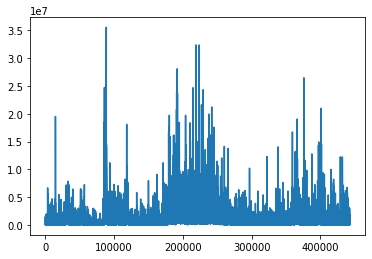

In [17]:
df['Volume USDT XRP'].plot()

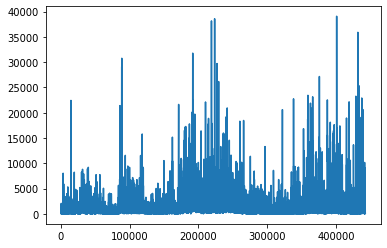

In [19]:
df['tradecount XRP'].plot()